<a href="https://colab.research.google.com/github/kayaisacat/IAI5101_Assignment2/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A: Supervised Learning

In [43]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [44]:
# using colab from drive
# from google.colab import drive
# drive.mount('/content/drive')

In [45]:
# Load the data
#df=pd.read_csv('drive/My Drive/Colab Notebooks/concrete.csv')
df=pd.read_csv('/Users/yuting/Desktop/Assignment2/concrete.csv')

In [46]:
# check the initial five records
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## I. EDA :

### Univariate Analysis: 
#### 1. Build a histogram to show the distribution and central values of all the variables

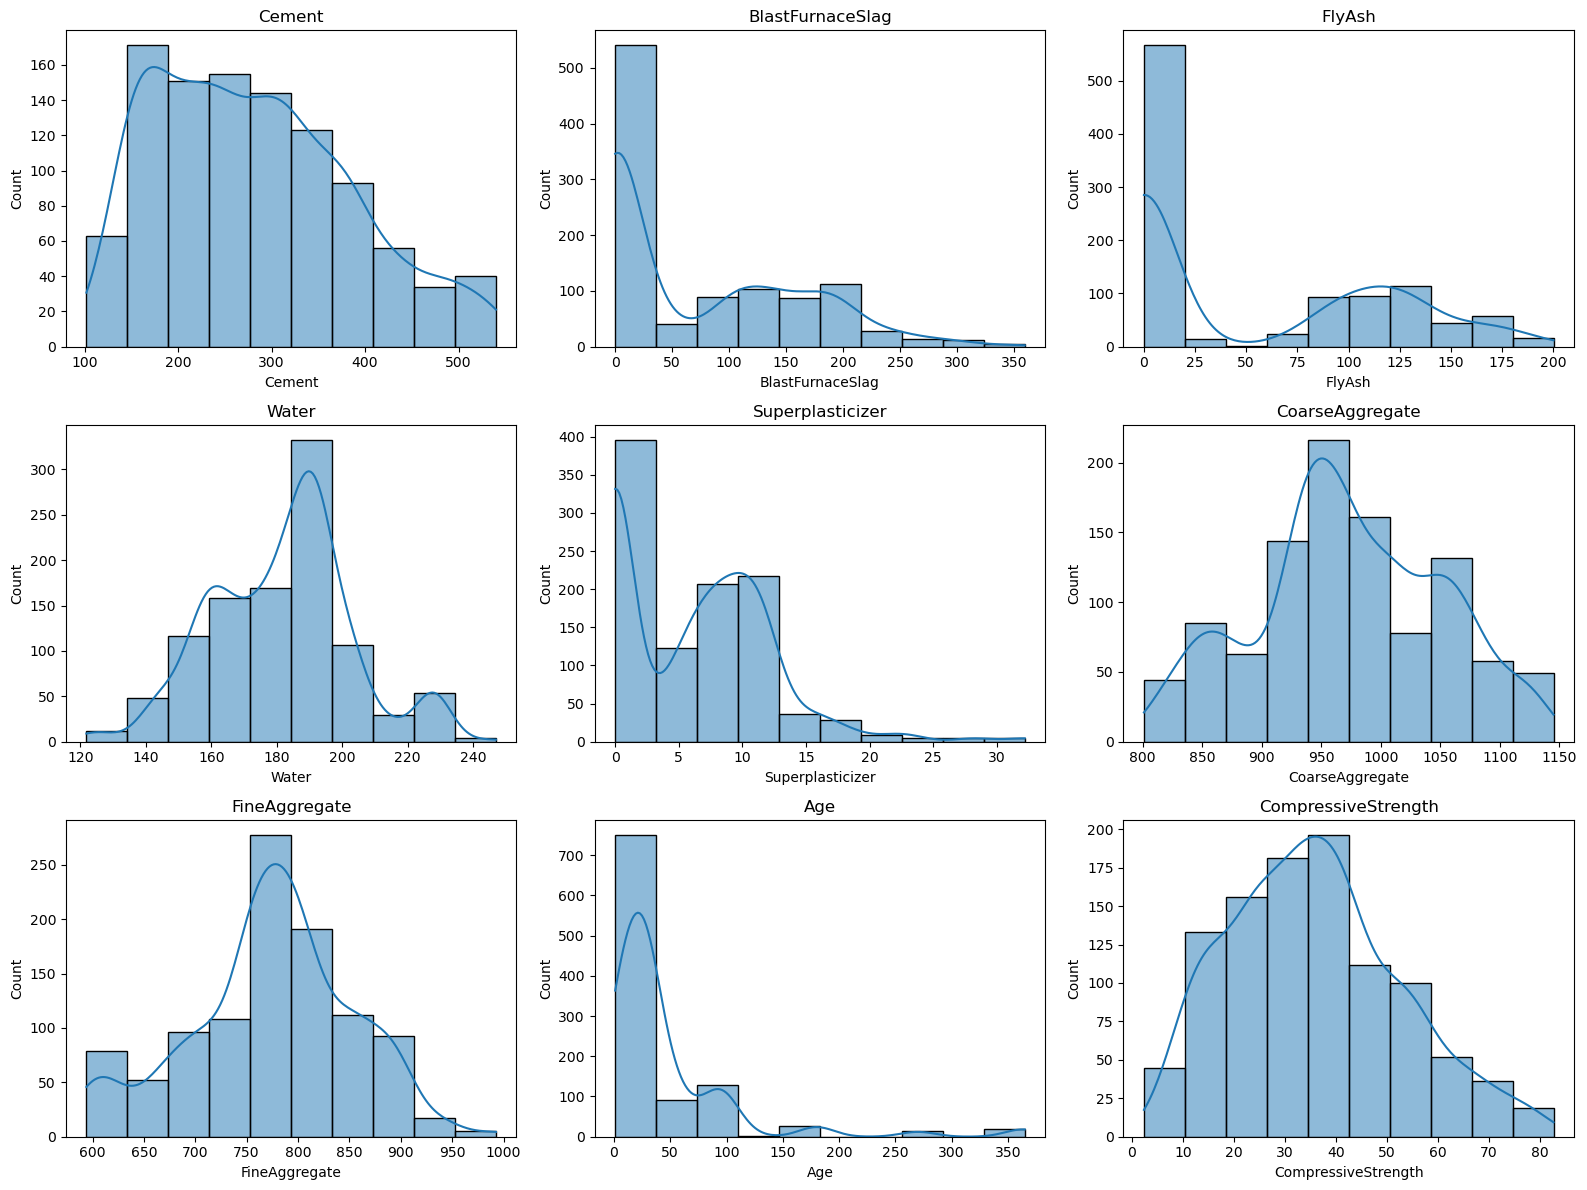

In [48]:
# Set up the figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Loop through each variable and create a histogram
for i, var in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(data=df[var], bins=10, kde=True, ax=axs[row][col])
    axs[row][col].set_title(var)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [49]:
# Get central values of all variables
central_values = df.describe().loc[['mean', '50%'], :]
central_values = central_values.T
print(central_values)

                           mean      50%
Cement               281.167864  272.900
BlastFurnaceSlag      73.895825   22.000
FlyAsh                54.188350    0.000
Water                181.567282  185.000
Superplasticizer       6.204660    6.400
CoarseAggregate      972.918932  968.000
FineAggregate        773.580485  779.500
Age                   45.662136   28.000
CompressiveStrength   35.817961   34.445


#### 2. Use a boxplot to determine if there are outliers in the variables

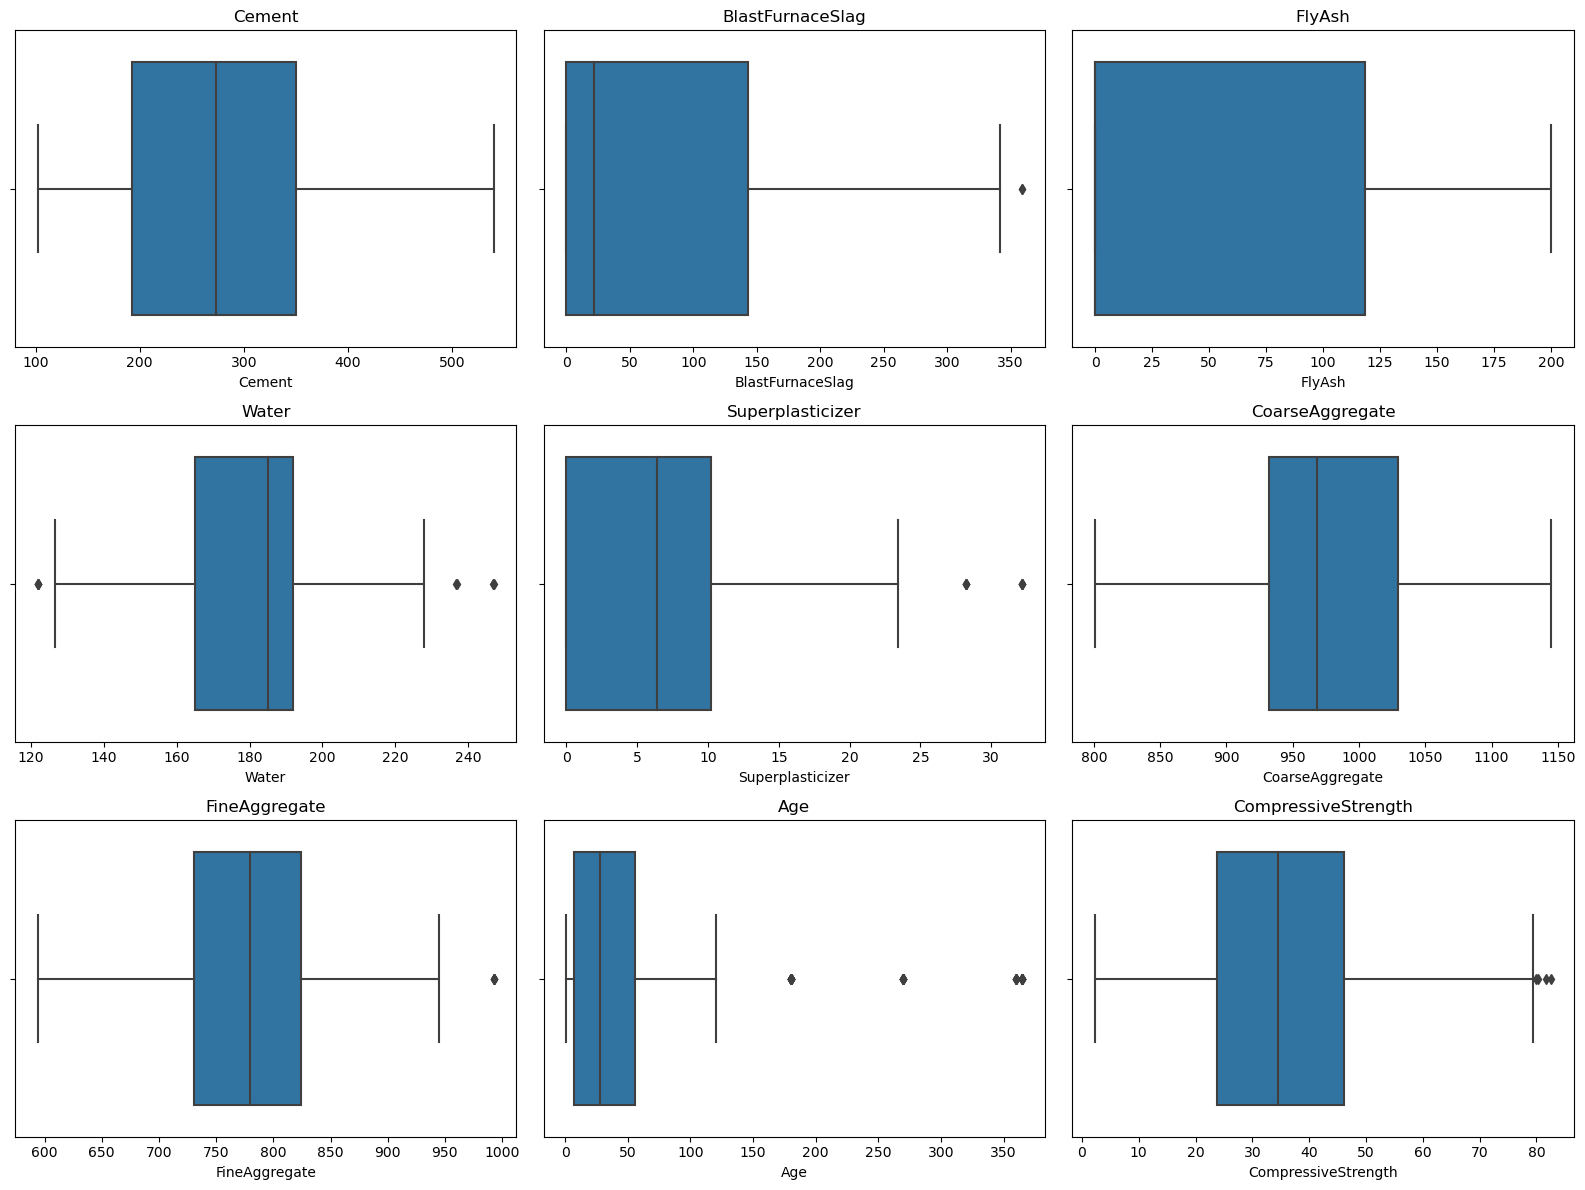

In [50]:
# Set up the figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Loop through each variable and create a boxplot
for i, var in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[var], ax=axs[row][col])
    axs[row][col].set_title(var)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Blast Furnace Slag, Water , Super plasticizer, Fine Aggregate, Age, Compressive Strength
have outliners in dataset. 

### Multivariate Analysis:
#### 1. Use a pair plot to determine the relationship and degree of relation between independent variables and between independent variables

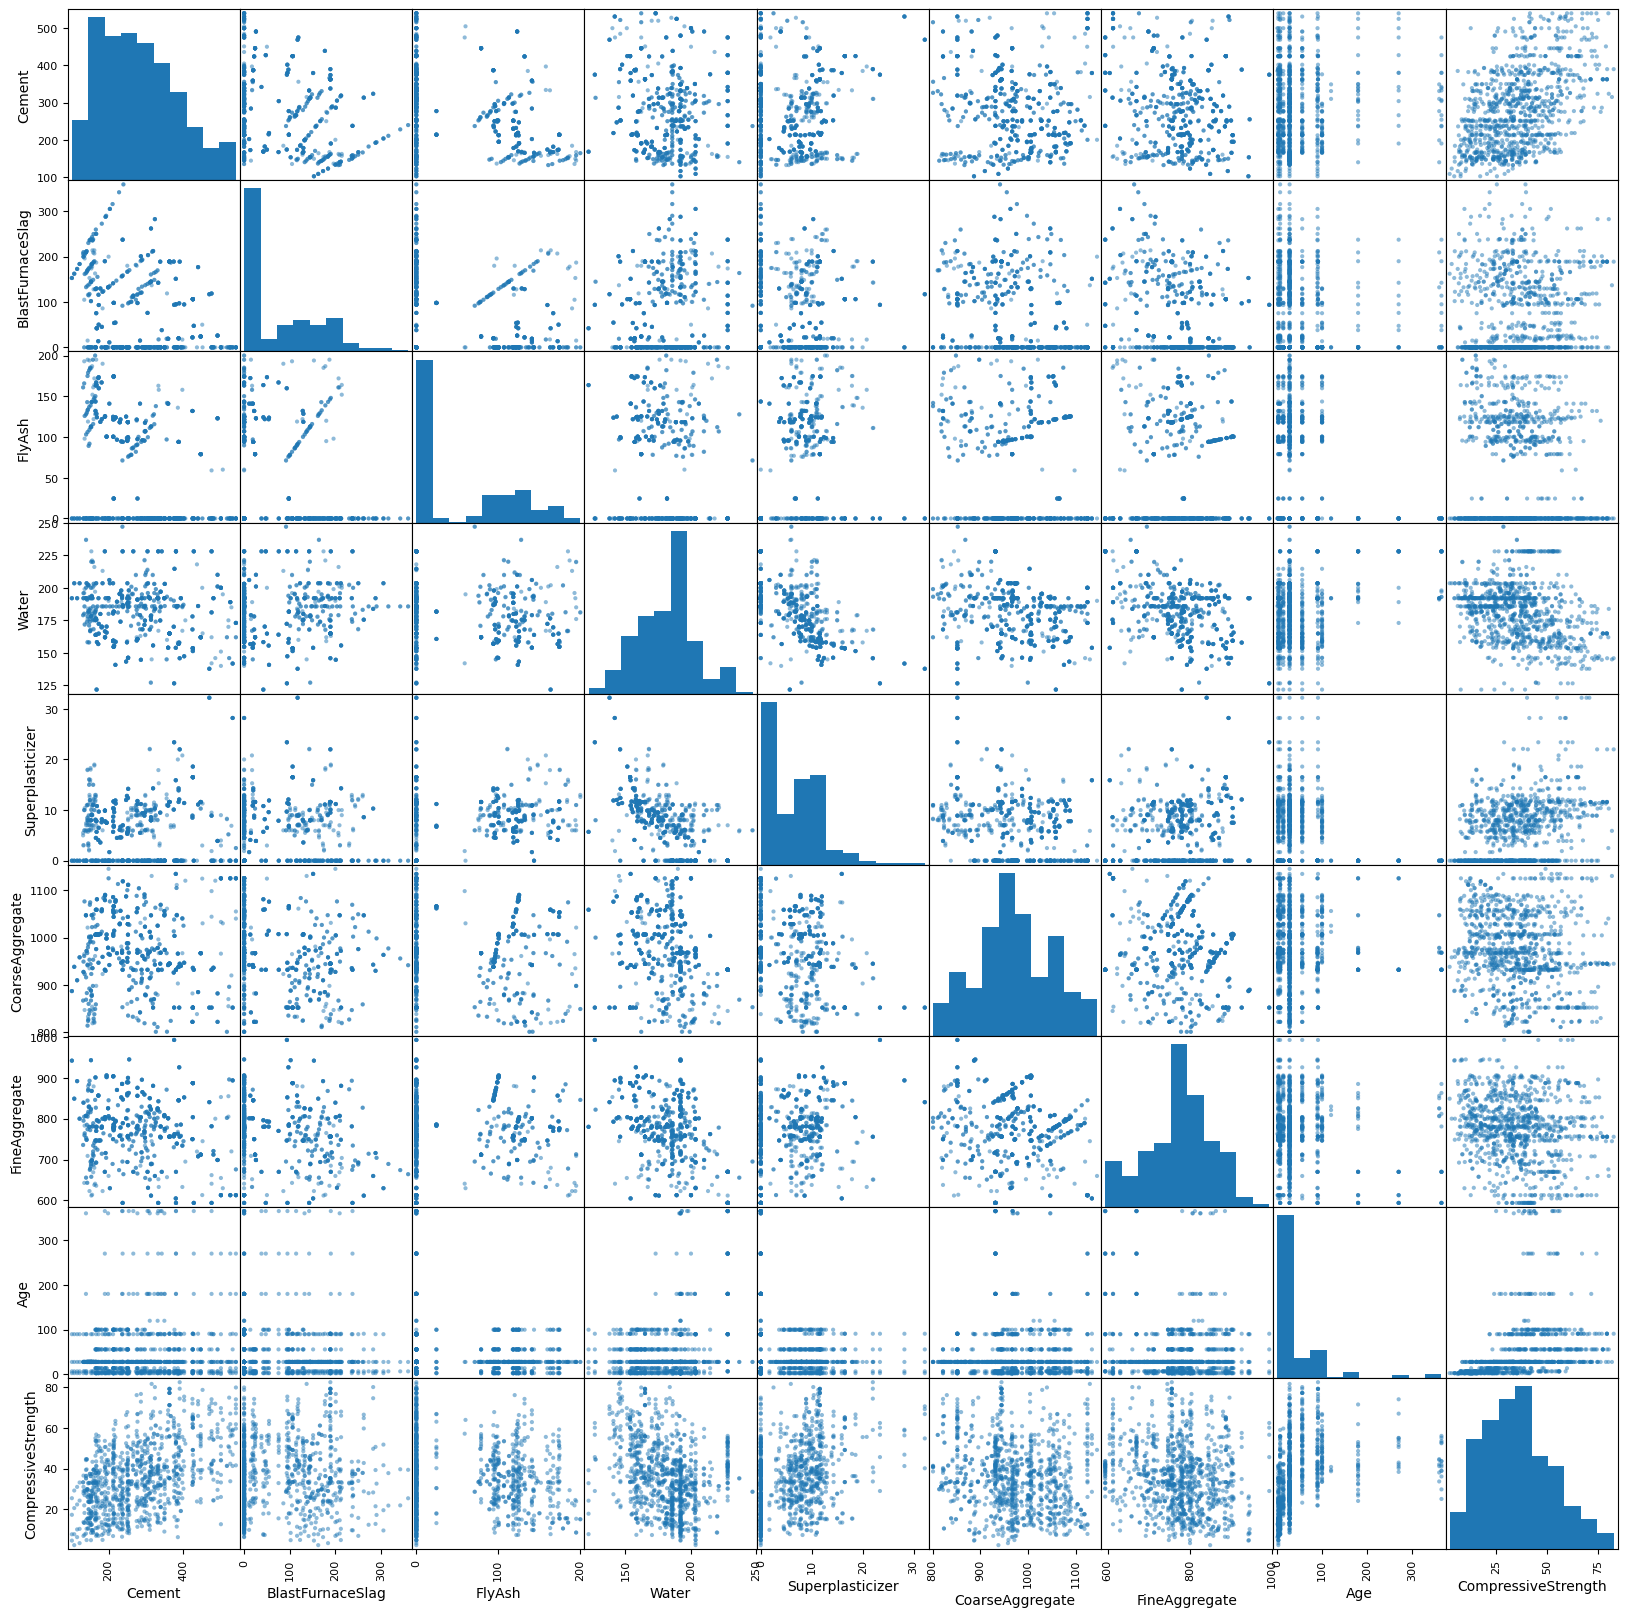

In [51]:
# draw matrix
scatter_matrix(df,figsize=(20,20));

#### 2. Use a heatmap to check for correlation between predictor variables

In [52]:
corr = df.corr()
corr

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAsh,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CompressiveStrength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot: >

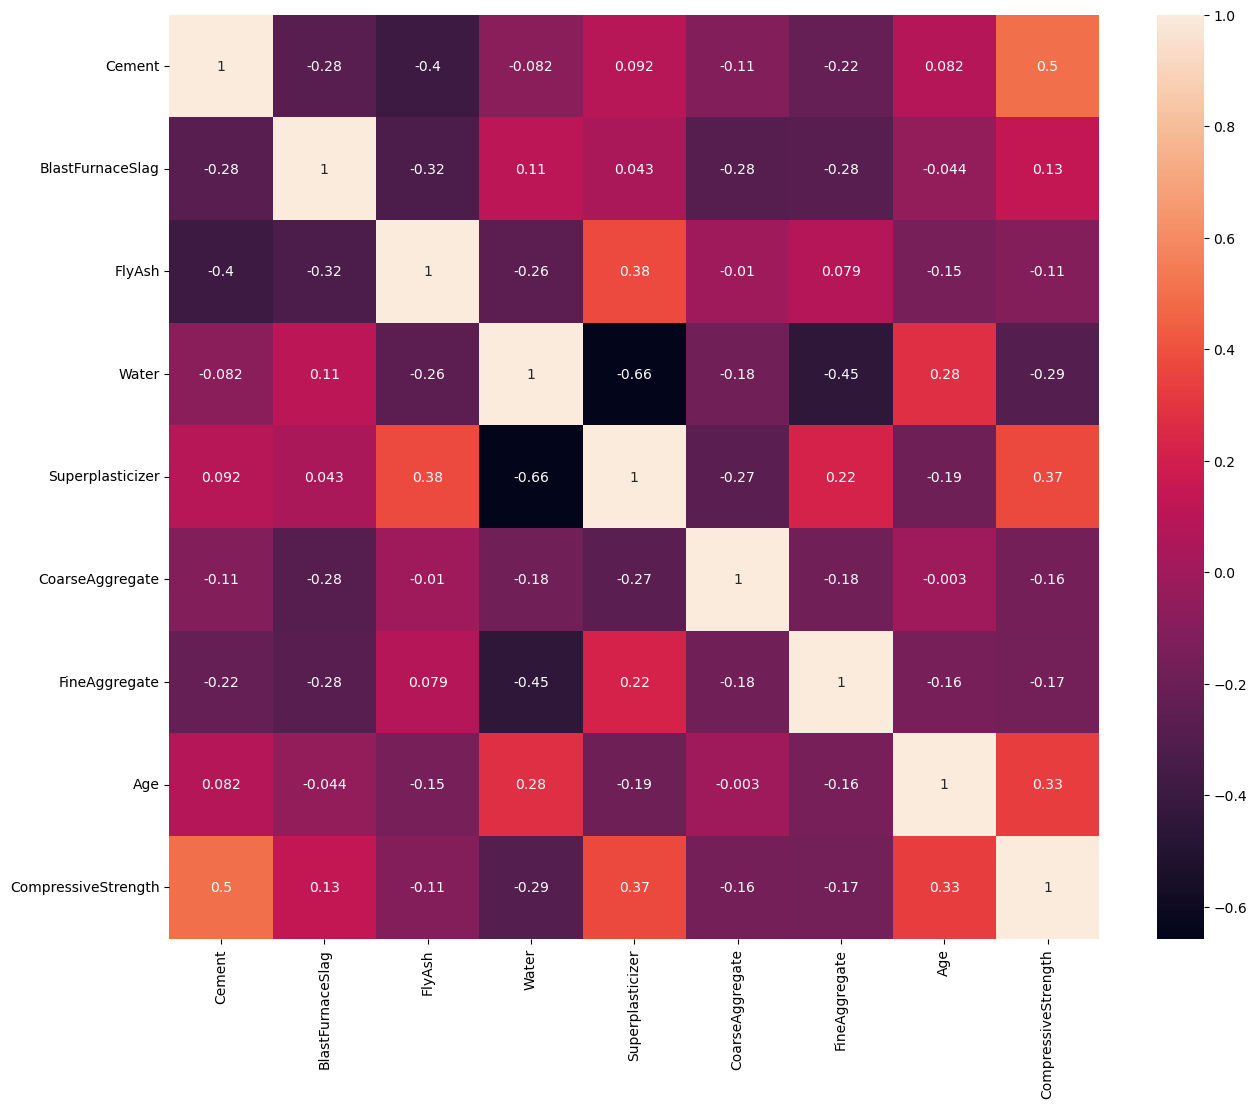

In [53]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot = True)

## II. Feature Engineering

### Ensure data is in the correct format for downstream processes
#### 1. Check for duplicates & missing values and drop, if present

In [54]:
# check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


In [55]:
# check for deplicate values
print("Duplicates:\n", df.duplicated().sum())

Duplicates:
 25


In [56]:
# the shape of dataframe
df.shape

(1030, 9)

In [57]:
# drop duplicates
df = df.drop_duplicates()
# check the data shape
df.shape

(1005, 9)

There are 0 missing value and 25 duplicate values in the concrete dataset,  after drop the total data changed from 1030 rows to 1005 rows.

#### 2. Remove possible outliners in the dataset


I define the outliners as greater than 75% quartile add the 1.5 Interquatrile range and less than 25% quartile subtract the 1.5 Interquatrile range.

In [58]:
# Drop the outlier observations using quartile
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_threshold = q1 - (1.5 * iqr)
upper_threshold = q3 + (1.5 * iqr)

# Identify the outlier observations
outliers_low = (df < lower_threshold)
outliers_high = (df > upper_threshold)
outliers = outliers_low | outliers_high

# Remove the outlier observations
df = df[~outliers.any(axis=1)]

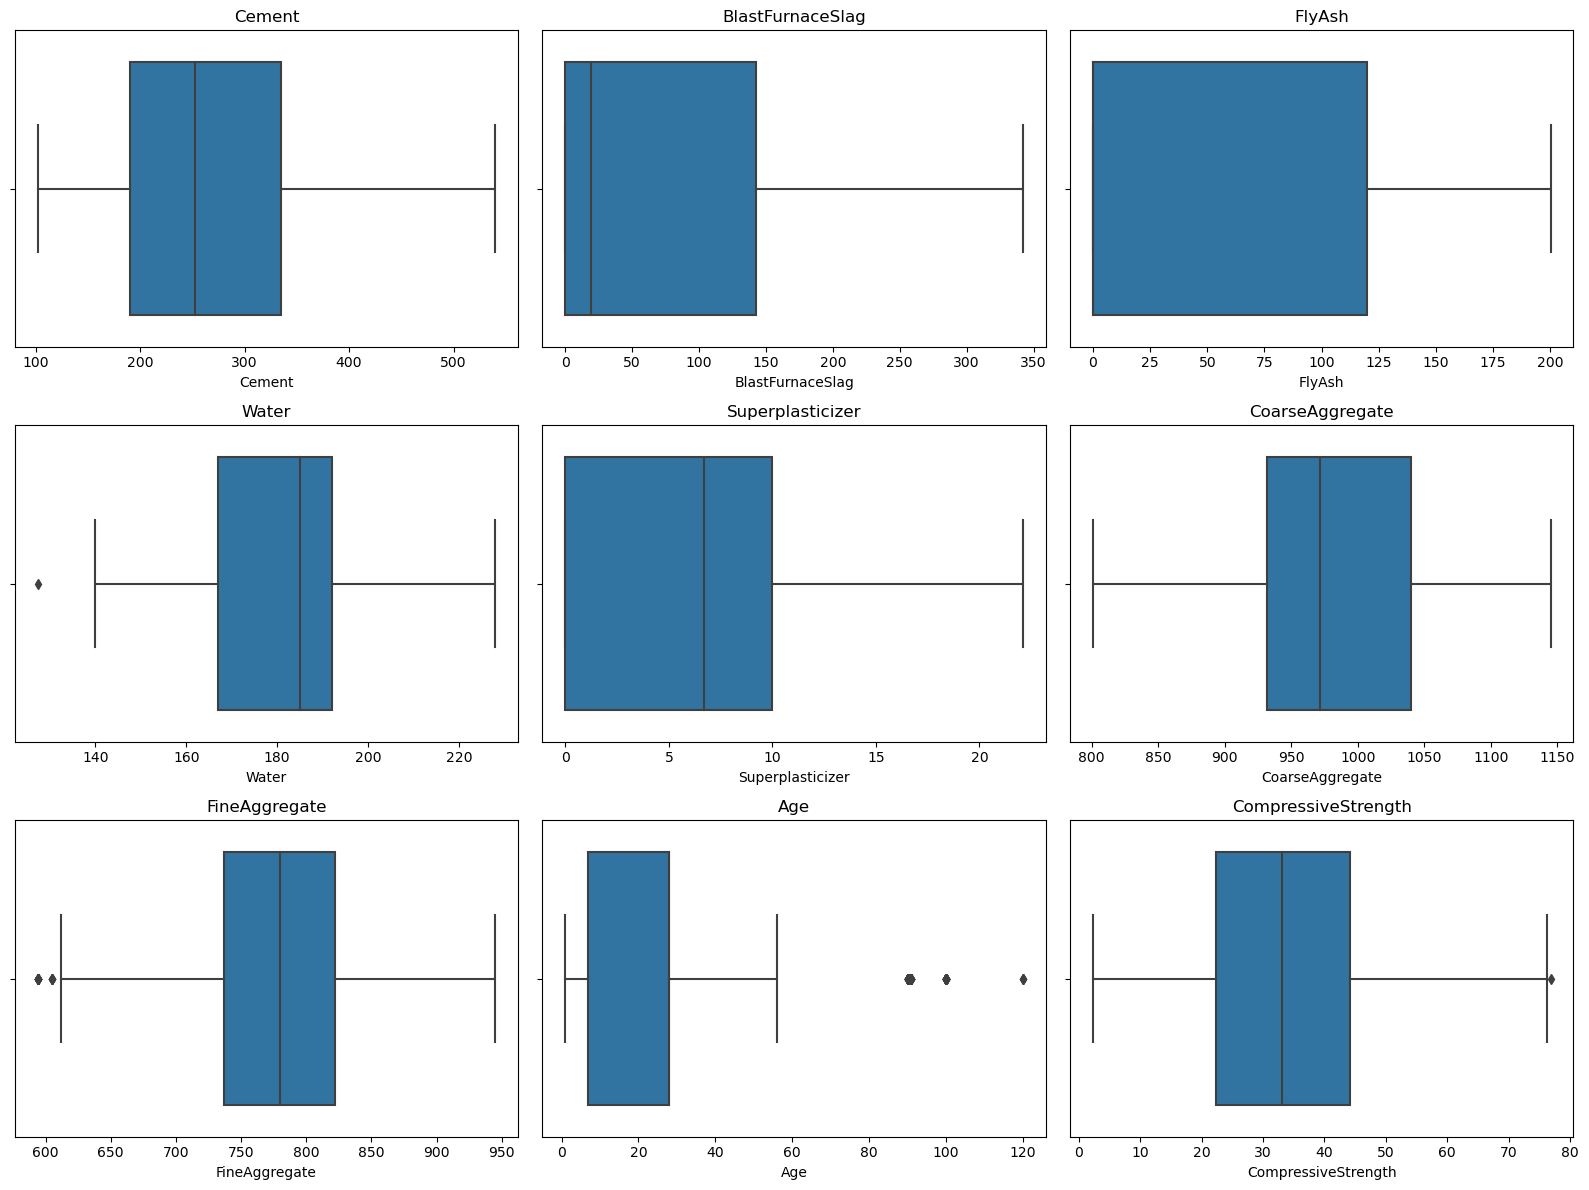

In [59]:
# check the outliers have been removed
# Set up the figure
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# Loop through each variable and create a boxplot
for i, var in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[var], ax=axs[row][col])
    axs[row][col].set_title(var)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

As you can see from boxplots, unreasonable outliers have been removed. For example, there are four values ​​in age that are over 150 years old. Although there are outliers in the above image, they are all within a reasonable range, so there is no need to deal with them again.

#### 3. Check for zero in the dataset and impute with the mean

In [60]:
print('Frequency of negative or zero is:\n', (df <= 0).sum())

Frequency of negative or zero is:
 Cement                   0
BlastFurnaceSlag       432
FlyAsh                 456
Water                    0
Superplasticizer       317
CoarseAggregate          0
FineAggregate            0
Age                      0
CompressiveStrength      0
dtype: int64


In [61]:
# Check for zeros in the dataset and impute with the mean
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
df = pd.DataFrame(imp_mean.fit_transform(df), columns=df.columns)
print('Frequency of negative or zero is:\n', (df <= 0).sum())

Frequency of negative or zero is:
 Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64


#### 4. Check for class imblance and handle, if necessary

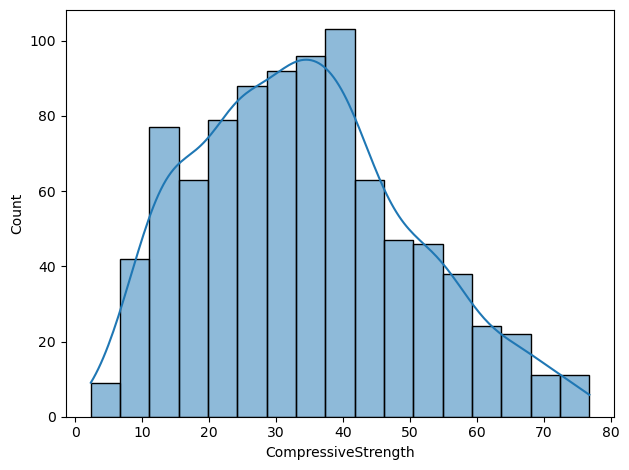

In [62]:
# The target variable is CompressiveStrength
# so we will check for class imblance and handle by examining the distribution 
sns.histplot(df['CompressiveStrength'], kde=True)
plt.tight_layout(); plt.show()


From the histgoram, we can see that the distribution is not heavily skewed towards one class, so we can say that there is no class imblance.

#### 5. Scale the data using a standard scaler

In [63]:
# Initialize the StandardScaler 
scaler = StandardScaler() 
# To scale data sicne all data are not binary
df_scaled = scaler.fit_transform(df)

## III. Model Development I
### Ensemble Method:

#### 1. Split dataset into train (70%) and test (30%) and build predictive models to determine the strength of concrete using the following techniques: K-Nearest Neighbor Regressor, Random Forest, and XGBoost

In [64]:
# Split the data into training and test sets
X = df.drop(['CompressiveStrength'], axis=1)
y = df['CompressiveStrength']

# set seed for reproducability
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape,y_train.shape)

# Scale the data using a standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(637, 8) (637,)


In [65]:
# K-Nearest Neighbor Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_score = knn.score(X_test_scaled, y_test)
print('K-Nearest Neighbor Regressor Score:', knn_score)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train_scaled, y_train)
rf_score = rf.score(X_test_scaled, y_test)
print("Random Forest Regressor score:", rf_score)

# XGBoost Regressor
xgb = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
xgb.fit(X_train_scaled, y_train)
xgb_score = xgb.score(X_test_scaled, y_test)
print("XGBoost Regressor score:", xgb_score)

K-Nearest Neighbor Regressor Score: 0.728743809906443
Random Forest Regressor score: 0.908542780674901
XGBoost Regressor score: 0.9259923590944008


We got the evaluation score of each model, and we can see that the XGBoost is better perfomance than others. The R-squared is 0.93, which means XGBoost has a great prediction.

#### 2. Use a voting regressor to predict the values for the ensemble of heterogeneous models above (K-Nearest Neighbor Regressor, Random Forest & xGBoost).

In [66]:
# Define the voting regressor
voting_regressor = VotingRegressor([('knn', knn), ('rf', rf), ('xgb', xgb)])

# Train the voting regressor
voting_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = voting_regressor.predict(X_test_scaled)

# Evaluate the performance of the voting regressor
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = voting_regressor.score(X_test_scaled, y_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)
print("Score:", score)

MSE: 25.260576384616694
RMSE: 5.0259900899839325
MAE: 3.907981373374763
R-squared: 0.9021969501020165
Score: 0.9021969501020165


The ensemble of heterogeneous models have a good predition, and the evaluation of the voting regressor has a great performance which R-squared equals to 0.9.

## IV. Model Development II
### Deep Learning:

#### 1. Split dataset into train (70%) and test (30%) and train a deep neural network using Keras.

In [67]:
# We split dataset in part III (Model Deveploment I), so let's check the dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head()

(637, 8) (274, 8) (637,) (274,)


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
85,475.0,118.800000,119.992967,181.1,8.900000,852.1,781.5,56.0
819,313.3,135.870355,113.000000,178.5,8.000000,1001.9,688.7,28.0
161,238.1,135.870355,94.100000,186.7,7.000000,949.9,847.0,14.0
396,446.0,24.000000,79.000000,162.0,11.600000,967.0,712.0,56.0
527,307.0,135.870355,119.992967,193.0,9.237205,968.0,812.0,90.0


In [68]:
# Define the model architecture
model = Sequential()

# The layer 1 has 64 neurons & receives an input with 8, activated with the ReLU activation function
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# The layer 2 has 32 neurons, activated with the ReLU
model.add(Dense(32, activation='relu'))

# The final layer is the output & has one neuron.
model.add(Dense(1, activation='sigmoid'))

# Compile the model, and mean squared error (MSE) for regression problem
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 1348.3510 - mae: 33.1742 - val_loss: 1327.8899 - val_mae: 32.7049
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1348.3511 - mae: 33.1742 - val_loss: 1327.8899 - val_mae: 32.7049
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1348.3510 - mae: 33.1742 - val_loss: 1327.8899 - val_mae: 32.7049
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1348.3511 - mae: 33.1742 - val_loss: 1327.8899 - val_mae: 32.7049
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1348.3507 - mae: 33.1742 - val_loss: 1327.8899 - val_mae: 32.7049
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1348.3507 - mae: 33.1742 - val_loss: 1327.8899 - val_mae: 32.7049
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1348.3510 - mae: 33.1742 - val_loss: 1327.8899 - val_mae: 32.7049
Epoch 8/100
20/20 [========

In [69]:
# Evluation 
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss(MSE): {score[0]} | Test MAE: {score[1]}')

Test loss(MSE): 1327.889892578125 | Test MAE: 32.704891204833984


#### 2. Try to improve the model by changing the activation function or dropout rate. What effects does any of these have on the result?

In [70]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Add the dropout layer after a regular layer 
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
# Add the dropout layer after a regular layer 
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model, and mean squared error (MSE) for regression problem
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
20/20 [==============================] - 0s 6ms/step - loss: 13084.3457 - mae: 90.0260 - val_loss: 439.7946 - val_mae: 17.1863
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 5441.6411 - mae: 57.3136 - val_loss: 232.1372 - val_mae: 12.5990
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 2668.0483 - mae: 40.9472 - val_loss: 411.3436 - val_mae: 16.1727
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1812.0844 - mae: 32.5724 - val_loss: 572.0526 - val_mae: 19.3937
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1239.2886 - mae: 27.6361 - val_loss: 686.2139 - val_mae: 21.7897
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1081.2762 - mae: 25.6349 - val_loss: 551.6950 - val_mae: 18.9481
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 913.7006 - mae: 22.6903 - val_loss: 460.2737 - val_mae: 17.0758
Epoch 8/100
20/20 [===============

In [71]:
# Evluation 
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss(MSE): {score[0]} | Test MAE: {score[1]}')

Test loss(MSE): 118.64028930664062 | Test MAE: 8.718331336975098


We added a dropout rate and changed the activation function of the last layer to "linear", which improved the performance of our deep neural network model. The smaller MSE and MAE values indicate that the model's predictions are closer to the actual values, which is a good indication that the model is performing better.

## V. Model Comparsion, Evaluation

#### 1. Compare the results of the ensemble models with the deep neural network model in terms of the following criteria: RSME, MAE, MSE, and R2 accuracy.

In [72]:
# Ensemble models
print("K-Nearest Neighbor Regressor Score: 0.728743809906443")
print("Random Forest Regressor score: 0.908542780674901")
print("XGBoost Regressor score: 0.9259923590944008")
print("The results of the ensemble models are as follows:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)



K-Nearest Neighbor Regressor Score: 0.728743809906443
Random Forest Regressor score: 0.908542780674901
XGBoost Regressor score: 0.9259923590944008
The results of the ensemble models are as follows:
MSE: 25.260576384616694
RMSE: 5.0259900899839325
MAE: 3.907981373374763
R-squared: 0.9021969501020165


In [73]:
# The deep neutal network model 
y_pred = model.predict(X_test)
r_2 = r2_score(y_test, y_pred)
print("The results of the deep neural network model are as follows:")
print("MSE:", score[0])
print("RMSE:", np.sqrt(score[0]))
print("MAE:", score[1])
print("R-squared:", r_2)

9/9 [==============================] - 0s 638us/step
The results of the deep neural network model are as follows:
MSE: 118.64028930664062
RMSE: 10.89221232379541
MAE: 8.718331336975098
R-squared: 0.5406525238034823


Comparing the results, the ensemble model performed better than the deep neural network model in the terms of MSE, RMSE, MAE, and R-squared accuracy. The Voting Regressor and XGBoost Regressor had a similar performance, even XGBoost score is better than the emsemble model, while the KNN regressor performed the worst among the ensemble models. 
Overall, the ensemble performed the best according to all the criteria, and the deep neural network model performed the worst.

# Part B: Unsupervised Learning

In [74]:
# load the data
data = pd.read_csv('/Users/yuting/Desktop/Assignment2/housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [75]:
# check the missing value
data.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [76]:
# check duplicates
print(data.drop_duplicates(inplace=True))

None


In [77]:
data.shape

(20640, 9)

#### 1. Perform k‐means clustering on the selected attributes, specifying k = 6 clusters and plot.

In [78]:
# using the median income, longitude and latitude to create economic segments in different regions.
X = data[['MedInc', 'Latitude', 'Longitude']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 645.0 KB


In [79]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

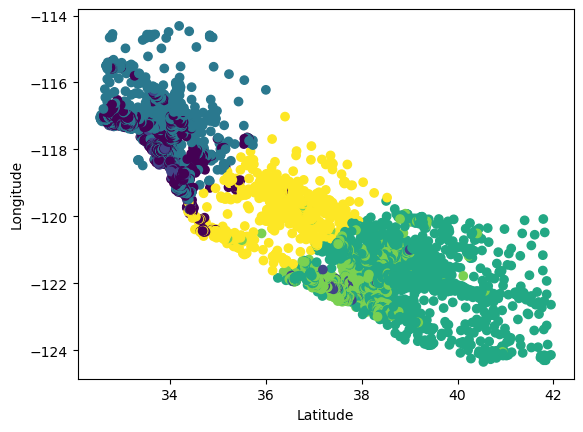

In [80]:
# Plot the resulting clusters
plt.scatter(X['Latitude'], X['Longitude'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

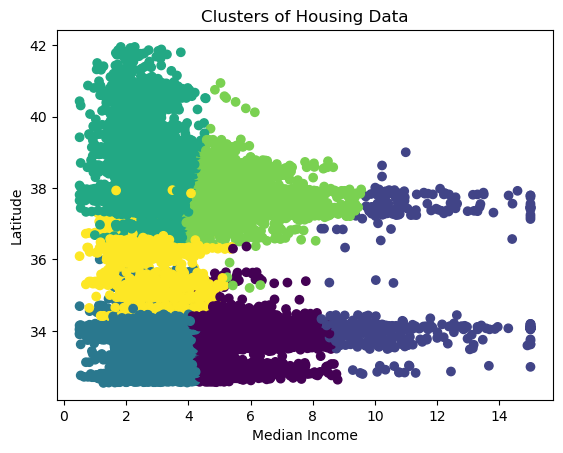

In [81]:
plt.scatter(X['MedInc'], X['Latitude'], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters of Housing Data')
plt.xlabel('Median Income')
plt.ylabel('Latitude')
plt.show()

#### 2. Apply the elbow method to determine the best k and plot.


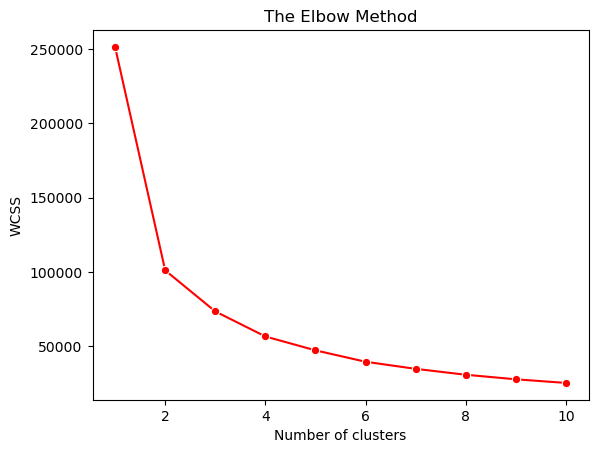

In [82]:
# Using the elbow method to find the optimal number of clusters
wcss = [] # the within-cluster sum of squares (WCSS)
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeans = kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

sns.lineplot(x=K, y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see that the elbow point is 2, which corresponds the optimal number of clusters as the value of 2 at the elbow point.

#### 3. Evaluate the quality of the clusters using the Silhouette Coefficient method.

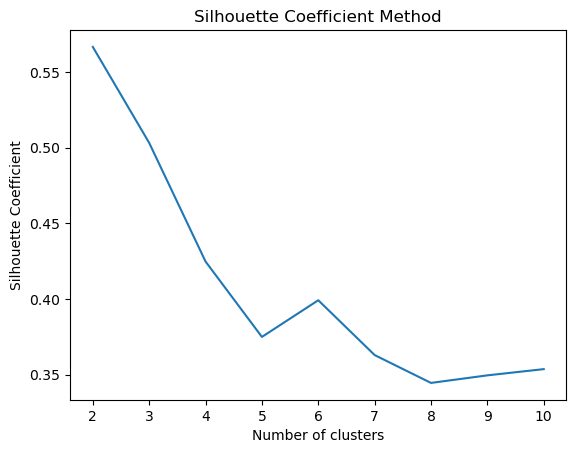

Silhouette Coefficient: 0.35372298619304016


In [83]:
silhouette_coeff = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coeff.append(score)

plt.plot(range(2, 11), silhouette_coeff)
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
print(f"Silhouette Coefficient: {score}")

The Silhouette Coefficient is 0.35, indicating a moderately good score for the quality of the clusters. However, the score is not very high, as the Silhouette Coefficient ranges from -1 to 1, with higher values indicating better clustering quality. 